# Assignment 4
## ✅ Rename the filename with your roll number. E.g. if your roll number is `MT24003` then rename the file `MT24003_a4.ipynb`.
## ✅ Write code only in the sections marked with `# YOUR CODE HERE`. No, you can NOT write code anywhere else.
## ✅ Download and extract the `data.zip` folder next to this file. If you extract it correctly, you will have a `data` folder next to this file.

## ❌ Do not modify any other function or class definitions; doing so may lead to the autograder failing to judge your submission, resulting in a zero.
## ❌ Deleting or adding new cells may lead to the `autograder` failing to judge your submission, resulting in a zero. Even if a cell is empty, do NOT delete it.
## ❌ Do NOT install / import any other libraries. You should be able to solve all the questions using only the libraries imported below.

In [ ]:
!pip install torch==2.1.2 torchvision==0.16.2 torchaudio==2.1.2 -q
!pip install numpy==1.25.2 -q
!pip install soundfile==0.13.0 -q
!pip install pandas==2.2.3 -q
!pip install matplotlib==3.9.4 -q
!pip install scikit-image==0.21.0 -q
!pip install tqdm==4.67.1 -q

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# `Stock Price Prediction LSTM Model`
The task is to train an LSTM model to predict the stock price of `ASIANPAINT.NS`. Your model will be evaluated based on its ability to predict the stock price for the hourly closing price for 5 days after the submission deadline.

1. Collect your own data for stock prices.
   1. Feel free to collect data from any source you like. You can use APIs, web scraping (gotcha: look at robots.txt), or any other method to collect the data.
   2. Recommendation: dump data manually from [yahoofinance](https://finance.yahoo.com/chart/ASIANPAINT.NS?guccounter=1#eyJsYXlvdXQiOnsiaW50ZXJ2YWwiOjE1LCJwZXJpb2RpY2l0eSI6MSwidGltZVVuaXQiOiJtaW51dGUiLCJjYW5kbGVXaWR0aCI6NS45Mjg4NzAyOTI4ODcwMjksImZsaXBwZWQiOmZhbHNlLCJ2b2x1bWVVbmRlcmxheSI6dHJ1ZSwiYWRqIjp0cnVlLCJjcm9zc2hhaXIiOnRydWUsImNoYXJ0VHlwZSI6Im1vdW50YWluIiwiZXh0ZW5kZWQiOnRydWUsIm1hcmtldFNlc3Npb25zIjp7fSwiYWdncmVnYXRpb25UeXBlIjoib2hsYyIsImNoYXJ0U2NhbGUiOiJsaW5lYXIiLCJzdHVkaWVzIjp7InZvbCB1bmRyIjp7InR5cGUiOiJ2b2wgdW5kciIsImlucHV0cyI6eyJTZXJpZXMiOiJzZXJpZXMiLCJpZCI6InZvbCB1bmRyIiwiZGlzcGxheSI6InZvbCB1bmRyIn0sIm91dHB1dHMiOnsiVXAgVm9sdW1lIjoiIzBkYmQ2ZWVlIiwiRG93biBWb2x1bWUiOiIjZmY1NTQ3ZWUifSwicGFuZWwiOiJjaGFydCIsInBhcmFtZXRlcnMiOnsiY2hhcnROYW1lIjoiY2hhcnQiLCJlZGl0TW9kZSI6dHJ1ZSwicGFuZWxOYW1lIjoiY2hhcnQifSwiZGlzYWJsZWQiOmZhbHNlfX0sInBhbmVscyI6eyJjaGFydCI6eyJwZXJjZW50IjoxLCJkaXNwbGF5IjoiQVNJQU5QQUlOVC5OUyIsImNoYXJ0TmFtZSI6ImNoYXJ0IiwiaW5kZXgiOjAsInlBeGlzIjp7Im5hbWUiOiJjaGFydCIsInBvc2l0aW9uIjpudWxsfSwieWF4aXNMSFMiOltdLCJ5YXhpc1JIUyI6WyJjaGFydCIsInZvbCB1bmRyIl19fSwic2V0U3BhbiI6e30sIm91dGxpZXJzIjpmYWxzZSwiYW5pbWF0aW9uIjp0cnVlLCJoZWFkc1VwIjp7InN0YXRpYyI6dHJ1ZSwiZHluYW1pYyI6ZmFsc2UsImZsb2F0aW5nIjpmYWxzZX0sImxpbmVXaWR0aCI6MiwiZnVsbFNjcmVlbiI6dHJ1ZSwic3RyaXBlZEJhY2tncm91bmQiOnRydWUsImNvbG9yIjoiIzAwODFmMiIsImNyb3NzaGFpclN0aWNreSI6ZmFsc2UsInN5bWJvbHMiOlt7InN5bWJvbCI6IkFTSUFOUEFJTlQuTlMiLCJzeW1ib2xPYmplY3QiOnsic3ltYm9sIjoiQVNJQU5QQUlOVC5OUyIsInF1b3RlVHlwZSI6IkVRVUlUWSIsImV4Y2hhbmdlVGltZVpvbmUiOiJBc2lhL0tvbGthdGEiLCJwZXJpb2QxIjoxNzM4MjI2NzAwLCJwZXJpb2QyIjoxNzQwNjg0NjAwfSwicGVyaW9kaWNpdHkiOjEsImludGVydmFsIjoxNSwidGltZVVuaXQiOiJtaW51dGUiLCJzZXRTcGFuIjp7fX1dLCJyYW5nZSI6e319LCJldmVudHMiOnsiZGl2cyI6dHJ1ZSwic3BsaXRzIjp0cnVlLCJ0cmFkaW5nSG9yaXpvbiI6Im5vbmUiLCJzaWdEZXZFdmVudHMiOltdfSwicHJlZmVyZW5jZXMiOnsiY3VycmVudFByaWNlTGluZSI6dHJ1ZSwiZGlzcGxheUNyb3NzaGFpcnNXaXRoRHJhd2luZ1Rvb2wiOmZhbHNlLCJkcmF3aW5ncyI6bnVsbCwiaGlnaGxpZ2h0c1JhZGl1cyI6MTAsImhpZ2hsaWdodHNUYXBSYWRpdXMiOjMwLCJtYWduZXQiOmZhbHNlLCJob3Jpem9udGFsQ3Jvc3NoYWlyRmllbGQiOm51bGwsImxhYmVscyI6dHJ1ZSwibGFuZ3VhZ2UiOm51bGwsInRpbWVab25lIjoiQXNpYS9Lb2xrYXRhIiwid2hpdGVzcGFjZSI6NTAsInpvb21JblNwZWVkIjpudWxsLCJ6b29tT3V0U3BlZWQiOm51bGwsInpvb21BdEN1cnJlbnRNb3VzZVBvc2l0aW9uIjpmYWxzZX19) or use [yfinance](https://github.com/ranaroussi/yfinance) library.
   3. For simplicity, you can consider the Indian stock market timings (9:15 to 15:15) from Monday to Friday. After Friday, you may / may not consider the data for Saturday and Sunday, i.e. either skip the 2 days or append zeros for the period of 2 days.
   4. You may also encounter weekdays when the stock market is closed. Again, you can either skip these days or append zeros for the entire day.

2. Train the `StockPriceLSTM` model using the data you collected.
   1. **You MUST** use the `StockPriceLSTM` class defined below. Fill in the code where it says `# YOUR CODE HERE`.
   2. **You MUST** use `torch.nn.LSTM` layer to implement the model. Additionally, you can use any other layers that you think are necessary except mordern sequence modelling architectures like transformers or its variants.
   3. **You MUST** implement the input to the model such that it accepts a sequence of stock prices. This sequence can be of any length. Thus, you must forecast the stock price in an autoregressive manner.
   4. **You MUST** call the `save_model_weights` method of the `StockPriceLSTM` class to save your model weights. The model weights will be used to evaluate your model. Missing this step will result in a zero.
   5. Optionally, you can fill code in `preprocess_data` method to implement any data preprocessing steps. And, `postprocess_data` method to implement any prediction postprocessing steps.
   6. Your model will be evaluated at predicting the 15-minute closing price (from 9:15 to 15:15) for the period of next 5 days (i.e. 5*25=125 values). Attached files `past_5_days.csv` and `next_5_days.csv` contain dummy values for now. After submission, these files will be replaces with fresh market from before the submission deadline and 5 days after the submission deadline. So you will be able to see the performance of your model with live data!
   7. Run the `sanity_check` function to ensure that your model runs correctly. The function will plot the predicted stock prices for the next 5 days given the dummy data. So while the MSE score may not be very good, you can at least check if your pipeline is running correctly.
   8. You can use any optimizer, hyperparameters, etc.
   9. You can use any data preprocessing steps.

3. Submit a single .zip file with the following files:
   * ```
        changerollno_a4.zip
            ├── changerollno_a4.ipynb
            └── trained_lstm.pth
    ```

**GRADING** [Total: 5]
1. `1` point if the code in the cell marked with `# tests for StockPriceLSTM` runs without any errors on hidden test cases, otherwise `0` points. No partial points for this question.
2. Performance based on the MSE score of the model on the test data.
   * `4` points if MSE < 20
   * `3` points if 20 <= MSE < 100
   * `2` points if 100 <= MSE < 1000
   * `1` point if 1000 <= MSE < 5000
   * `0` points if MSE >= 5000

In [2]:
class StockPriceLSTM(torch.nn.Module):
    def __init__(self):
        super(StockPriceLSTM, self).__init__()
        self.lstm = torch.nn.LSTM(
            input_size=1,
            hidden_size=128,
            num_layers=4,
            batch_first=True,
            dropout=0.3,
            bidirectional=True  # Bidirectional LSTM
        )
        self.bn1 = torch.nn.BatchNorm1d(256)  # For bidirectional output
        self.linear = torch.nn.Sequential(
            torch.nn.Linear(256, 128),  # 2*hidden_size for bidirectional
            torch.nn.ReLU(),
            torch.nn.Dropout(0.2),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 1)
        )

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        lstm_out = lstm_out[:, -1, :]  # Take last timestep
        if lstm_out.shape[0] == 1:  # If batch size is 1, disable BatchNorm
            return self.linear(lstm_out).squeeze(-1)
        normalized = self.bn1(lstm_out)
        return self.linear(normalized).squeeze(-1)

    def preprocess_data(self, data):
        if not hasattr(self, 'data_params'):
            self.data_params = {
                'mean': np.nanmean(data),
                'std': np.nanstd(data) + 1e-8,
                'min': np.nanmin(data),
                'max': np.nanmax(data)
            }
        # Robust scaling with outlier protection
        scaled = (data - self.data_params['mean']) / self.data_params['std']
        return np.clip(scaled, -3, 3)  # Clip outliers

    def postprocess_data(self, data):
        return data * self.data_params['std'] + self.data_params['mean']

    def save_model_weights(self):
        torch.save(self.state_dict(), "trained_lstm.pth")

    def load_model_weights(self):
        self.load_state_dict(torch.load("trained_lstm.pth"))

    def predict_for_next_5_days(self):
        df_last_5_days = pd.read_csv('past_5_days.csv')
        raw_last_5_days = df_last_5_days.loc[:, "Close"].values
        try:
            last_5_days = self.preprocess_data(raw_last_5_days)
        except:
            print("no preprocessing")
        last_5_days_datetime = df_last_5_days.loc[:, "Datetime"].values
        df_next_5_days = pd.read_csv('next_5_days.csv')
        next_5_days = df_next_5_days.loc[:, "Close"].values
        next_5_days_datetime = df_next_5_days.loc[:, "Datetime"].values
        predictions = []

        self.eval()
        with torch.no_grad():
            input_sequence = last_5_days.copy()

            for _ in range(5*25):
                x = torch.FloatTensor(input_sequence[-5*25:]).unsqueeze(0).unsqueeze(-1)

                next_value = self(x).item()
                predictions.append(next_value)

                input_sequence = np.append(input_sequence, next_value)

            try:
                predictions = self.postprocess_data(np.array(predictions))
            except:
                print("no postprocessing")
            plt.figure(figsize=(10, 5))
            sequence_length = len(last_5_days)
            prediction_length = len(predictions)

            past_indices = np.arange(0, sequence_length)
            plt.plot(past_indices, raw_last_5_days, 'b-', label='Past 5 Days (5*25 values)')

            future_indices = np.arange(sequence_length, sequence_length + prediction_length)
            plt.plot(future_indices, predictions, 'r--', label='Predicted Next 5 Days')

            if next_5_days is not None:
                plt.plot(future_indices, next_5_days, 'g-', label='Actual Next 5 Days')
                mse = np.mean((np.array(predictions) - next_5_days) ** 2)
                plt.title(f'LSTM Autoregressive Prediction (MSE: {mse:.4f})')
                print(f'MSE: {mse:.4f}')
            else:
                plt.title('LSTM Autoregressive Prediction')

            plt.axvline(x=sequence_length-1, color='k', linestyle='--', alpha=0.3)
            plt.legend()
            plt.xlabel('Time Steps')
            plt.ylabel('Value')
            xticks = np.concatenate([last_5_days_datetime, next_5_days_datetime])
            plt.xticks(np.arange(0, len(xticks), 25), xticks[::25], rotation=45)
            plt.tight_layout()
            plt.savefig('lstm_prediction.png')
            plt.show()

            return mse

In [3]:
# tests for StockPriceLSTM

stock_price_lstm = StockPriceLSTM()


In [4]:
# Use this cell to train your model. ⚠️ Remember to save the model weights by calling `save_model_weights()`

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load and preprocess data
df = pd.read_csv('asianpaints_data.csv')
close_prices = df['Close'].values.astype(np.float32)

model = StockPriceLSTM().to(device)
processed_data = model.preprocess_data(close_prices)

sequence_length = 150
X, y = [], []
for i in range(len(processed_data) - sequence_length):
    X.append(processed_data[i:i+sequence_length])
    y.append(processed_data[i+sequence_length])
X = np.array(X)
y = np.array(y)

# Convert to tensors on GPU
X_tensor = torch.FloatTensor(X).unsqueeze(-1).to(device)
y_tensor = torch.FloatTensor(y).to(device)

class EnhancedLoss(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.huber = torch.nn.HuberLoss()

    def forward(self, preds, targets):
        # Ensure preds and targets have the same length
        if len(preds) != len(targets):
            min_length = min(len(preds), len(targets))
            preds = preds[:min_length]
            targets = targets[:min_length]

        # Calculate Huber loss
        huber_loss = self.huber(preds, targets)

        # Calculate direction loss
        if len(preds) > 1:  # Need at least 2 elements for direction
            pred_directions = torch.sign(preds[1:] - preds[:-1])
            target_directions = torch.sign(targets[1:] - targets[:-1])
            direction_loss = torch.mean(torch.abs(pred_directions - target_directions))
        else:
            direction_loss = torch.tensor(0.0).to(preds.device)

        return 0.7 * huber_loss + 0.3 * direction_loss

# Dataset and DataLoader
class StockDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

dataset = StockDataset(X_tensor, y_tensor)
train_size = int(0.85 * len(dataset))
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, len(dataset)-train_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64)

# Training configuration
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0003, weight_decay=0.005)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=8, factor=0.5)
criterion = EnhancedLoss().to(device)

# Training loop with early stopping
best_val_loss = float('inf')
patience = 15
trigger_times = 0

for epoch in range(400):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()
        train_loss += loss.item()

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            val_loss += criterion(outputs, targets).item()

    val_loss /= len(val_dataset)
    print(f'Epoch {epoch+1}: Train Loss: {train_loss/len(train_dataset):.4f}, Val Loss: {val_loss:.4f}')

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break

    scheduler.step(val_loss)

# Load best model and save final weights
model.load_state_dict(torch.load('best_model.pth'))
model.save_model_weights()

Epoch 1: Train Loss: 0.0031, Val Loss: 0.0038
Epoch 2: Train Loss: 0.0010, Val Loss: 0.0025
Epoch 3: Train Loss: 0.0009, Val Loss: 0.0013
Epoch 4: Train Loss: 0.0008, Val Loss: 0.0007
Epoch 5: Train Loss: 0.0008, Val Loss: 0.0006
Epoch 6: Train Loss: 0.0009, Val Loss: 0.0006
Epoch 7: Train Loss: 0.0007, Val Loss: 0.0006
Epoch 8: Train Loss: 0.0008, Val Loss: 0.0006
Epoch 9: Train Loss: 0.0006, Val Loss: 0.0005
Epoch 10: Train Loss: 0.0007, Val Loss: 0.0005
Epoch 11: Train Loss: 0.0008, Val Loss: 0.0006
Epoch 12: Train Loss: 0.0007, Val Loss: 0.0004
Epoch 13: Train Loss: 0.0006, Val Loss: 0.0004
Epoch 14: Train Loss: 0.0006, Val Loss: 0.0004
Epoch 15: Train Loss: 0.0006, Val Loss: 0.0004
Epoch 16: Train Loss: 0.0006, Val Loss: 0.0004
Epoch 17: Train Loss: 0.0007, Val Loss: 0.0004
Epoch 18: Train Loss: 0.0006, Val Loss: 0.0004
Epoch 19: Train Loss: 0.0007, Val Loss: 0.0004
Epoch 20: Train Loss: 0.0006, Val Loss: 0.0004
Epoch 21: Train Loss: 0.0006, Val Loss: 0.0004
Epoch 22: Train Loss: 

<ipython-input-4-f03a64f015a3>:117: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


In [5]:
def sanity_check():
    model = StockPriceLSTM()
    model.load_model_weights()
    mse = model.predict_for_next_5_days() # this mse does not represent the actual performance of the model

<ipython-input-2-764437ea5630>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load("trained_lstm.pth"))


MSE: 1297.5354


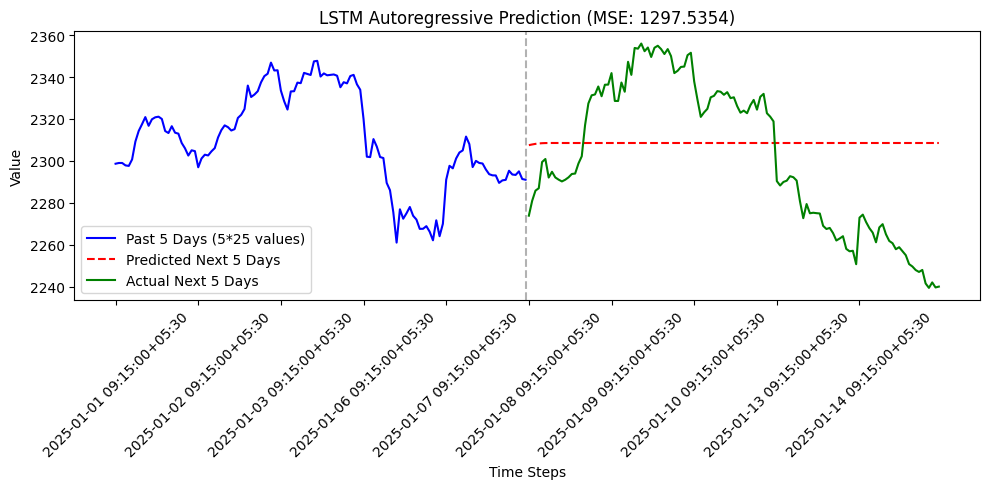

In [6]:
sanity_check()